<a href="https://colab.research.google.com/github/igordantasgf/analise_dados_microambientais/blob/main/estudos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime

In [18]:
data_path = '/content/drive/MyDrive/Bolsa - Edson/estudos/Pasta sem nome/labmim_completo_2016_2022.dat'
frame = pd.read_csv(data_path, sep=';')
tempo = list(zip(frame['year'],frame['month'],frame['day'],frame['hour']))
print(frame.columns)
frame

Index(['year', 'month', 'day', 'hour', 'T', 'Td', 'ur', 'pressure', 'WD', 'WS',
       'u', 'v', 'precip', 'Sw_dw', 'Sw_up', 'Lw_dw', 'Lw_up', 'Sw_dif',
       'Sw_par', 'RH_WXT', 'Temp_WXT', 'Net_CNR1', 'Net_NRLite', 'PSP_Wm2_Avg',
       'oc_topo', 'decl_rad', 'elev_solar', 'ang_hor', 'ang_zen',
       'ang_hor_por', 'nascer_h', 'por_h', 'ast_h', 'fc'],
      dtype='object')


,year,month,day,hour,T,Td,ur,pressure,WD,WS,...,oc_topo,decl_rad,elev_solar,ang_hor,ang_zen,ang_hor_por,nascer_h,por_h,ast_h,fc
0,2016,9,29,14,27.1200,NaN,71.6480,NaN,132.9910,2.0290,...,1045.315,-0.047,0.874,0.681,0.696,-6.042,5.958,18.042,14.599,1.191
1,2016,9,29,15,26.9380,NaN,73.6650,NaN,149.7170,1.8150,...,794.240,-0.047,0.622,0.942,0.949,-6.042,5.958,18.042,15.600,1.191
2,2016,9,29,16,26.6870,NaN,74.6230,NaN,106.4130,1.6430,...,489.998,-0.048,0.368,1.204,1.203,-6.042,5.958,18.042,16.600,1.191
3,2016,9,29,17,26.4570,NaN,75.1850,NaN,86.3810,1.2050,...,153.340,-0.048,0.113,1.466,1.458,-6.042,5.958,18.042,17.600,1.191
4,2016,9,29,18,25.7780,NaN,78.8070,NaN,98.0980,1.2480,...,0.000,-0.048,-0.142,1.728,1.713,-6.043,5.957,18.043,18.600,1.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52060,2022,9,14,13,25.7575,NaN,81.5167,1010.8750,154.3924,2.7922,...,1194.472,0.061,1.086,0.393,0.485,-5.946,6.054,17.946,13.501,1.171
52061,2022,9,14,14,26.2083,NaN,79.6867,1009.8583,169.6669,2.9262,...,1023.041,0.061,0.860,0.655,0.711,-5.946,6.054,17.946,14.501,1.171
52062,2022,9,14,15,26.8508,NaN,76.0992,1009.3667,146.8076,2.6029,...,780.574,0.061,0.616,0.917,0.954,-5.946,6.054,17.946,15.502,1.171
52063,2022,9,14,16,27.7925,NaN,71.8633,1009.2000,152.0525,1.2569,...,483.602,0.061,0.366,1.179,1.205,-5.947,6.053,17.947,16.502,1.171


In [23]:
# Formatação de datas
datas=[]
for i in tempo:
  i = list(i)
  datas.append(datetime.datetime(i[0],i[1],i[2],i[3]))
frame['datas'] = datas

In [20]:
# coluna na base de dados com Saldo Radioativo
frame['Rn'] = [sum(i) for i in list(zip(frame['Sw_dw'],-frame['Sw_up'],frame['Lw_dw'],-frame['Lw_up']))]

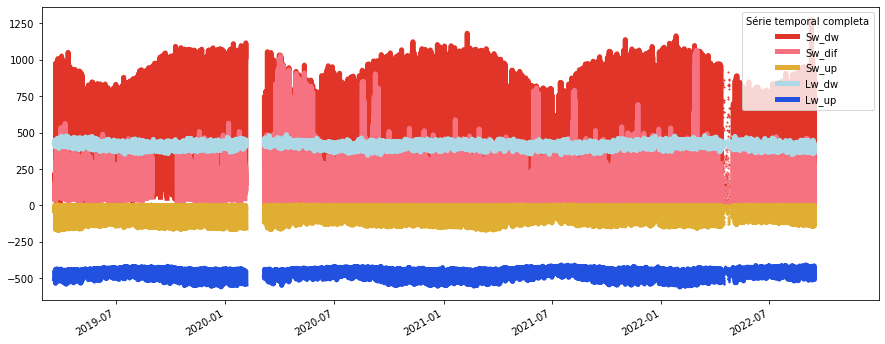

In [48]:
#@markdown Série temporal completa

fig, ax = plt.subplots(1,1,figsize=(15, 6))
ax.plot_date(frame['datas'], frame['Sw_dw'], c='#E03528', ls='-', lw=5, markersize=1, label='Sw_dw')
ax.plot_date(frame['datas'], frame['Sw_dif'], c='#F67280', ls='-', lw=5, markersize=1, label='Sw_dif')
ax.plot_date(frame['datas'], -frame['Sw_up'], c='#E0AE33', ls='-', lw=5, markersize=1, label='Sw_up')
ax.plot_date(frame['datas'], frame['Lw_dw'], c='lightblue', ls='-', lw=5, markersize=1, label='Lw_dw')
ax.plot_date(frame['datas'], -frame['Lw_up'], c='#2251E0', ls='-', lw=5, markersize=1, label='Lw_up')
plt.legend(title='Série temporal completa')
fig.autofmt_xdate()
ax.set_xlim([datetime.datetime(2019, 2, 27, 0, 0), datetime.datetime(2022, 12, 31, 0, 0)])
plt.show()

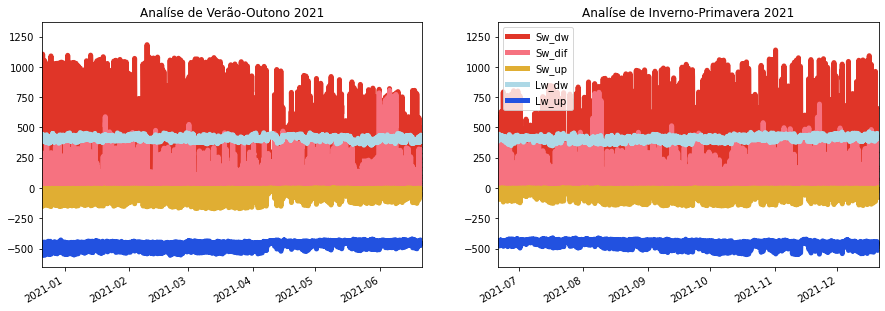

In [27]:
#@markdown Análise de ondas ao longo do ano em dois períodos e saldo de radiação

fig, ax = plt.subplots(1,2,figsize=(15, 5))

# Analíse de Verão-Outono 2021
ax[0].set_title("Analíse de Verão-Outono 2021")
ax[0].plot_date(frame['datas'], frame['Sw_dw'], c='#E03528', ls='-', lw=5, markersize=1, label='Sw_dw')
ax[0].plot_date(frame['datas'], frame['Sw_dif'], c='#F67280', ls='-', lw=5, markersize=1, label='Sw_dif')
ax[0].plot_date(frame['datas'], -frame['Sw_up'], c='#E0AE33', ls='-', lw=5, markersize=1, label='Sw_up')
ax[0].plot_date(frame['datas'], frame['Lw_dw'], c='lightblue', ls='-', lw=5, markersize=1, label='Lw_dw')
ax[0].plot_date(frame['datas'], -frame['Lw_up'], c='#2251E0', ls='-', lw=5, markersize=1, label='Lw_up')
fig.autofmt_xdate()
ax[0].set_xlim([datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2021, 6, 21, 0, 0)])

# Analíse de Inverno-Primavera 2021
ax[1].set_title("Analíse de Inverno-Primavera 2021")
ax[1].plot_date(frame['datas'], frame['Sw_dw'], c='#E03528', ls='-', lw=5, markersize=1, label='Sw_dw')
ax[1].plot_date(frame['datas'], frame['Sw_dif'], c='#F67280', ls='-', lw=5, markersize=1, label='Sw_dif')
ax[1].plot_date(frame['datas'], -frame['Sw_up'], c='#E0AE33', ls='-', lw=5, markersize=1, label='Sw_up')
ax[1].plot_date(frame['datas'], frame['Lw_dw'], c='lightblue', ls='-', lw=5, markersize=1, label='Lw_dw')
ax[1].plot_date(frame['datas'], -frame['Lw_up'], c='#2251E0', ls='-', lw=5, markersize=1, label='Lw_up')

plt.legend()
fig.autofmt_xdate()
ax[1].set_xlim([datetime.datetime(2021, 6, 21, 0, 0), datetime.datetime(2021, 12, 21, 0, 0)])

plt.show()